In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.stats import chi2, norm, cauchy
from iminuit import Minuit
from iminuit.cost import LeastSquares
# Cambiare directory per spostarsi nella cartella principale
import os
while not os.getcwd().endswith('Laboratorio_SiPM'):
    os.chdir('..')

import sys
sys.path.append('Config')
from lablib import *

# Sodio 30 min

Text(0.5, 1.0, 'Spettro di sodio e background')

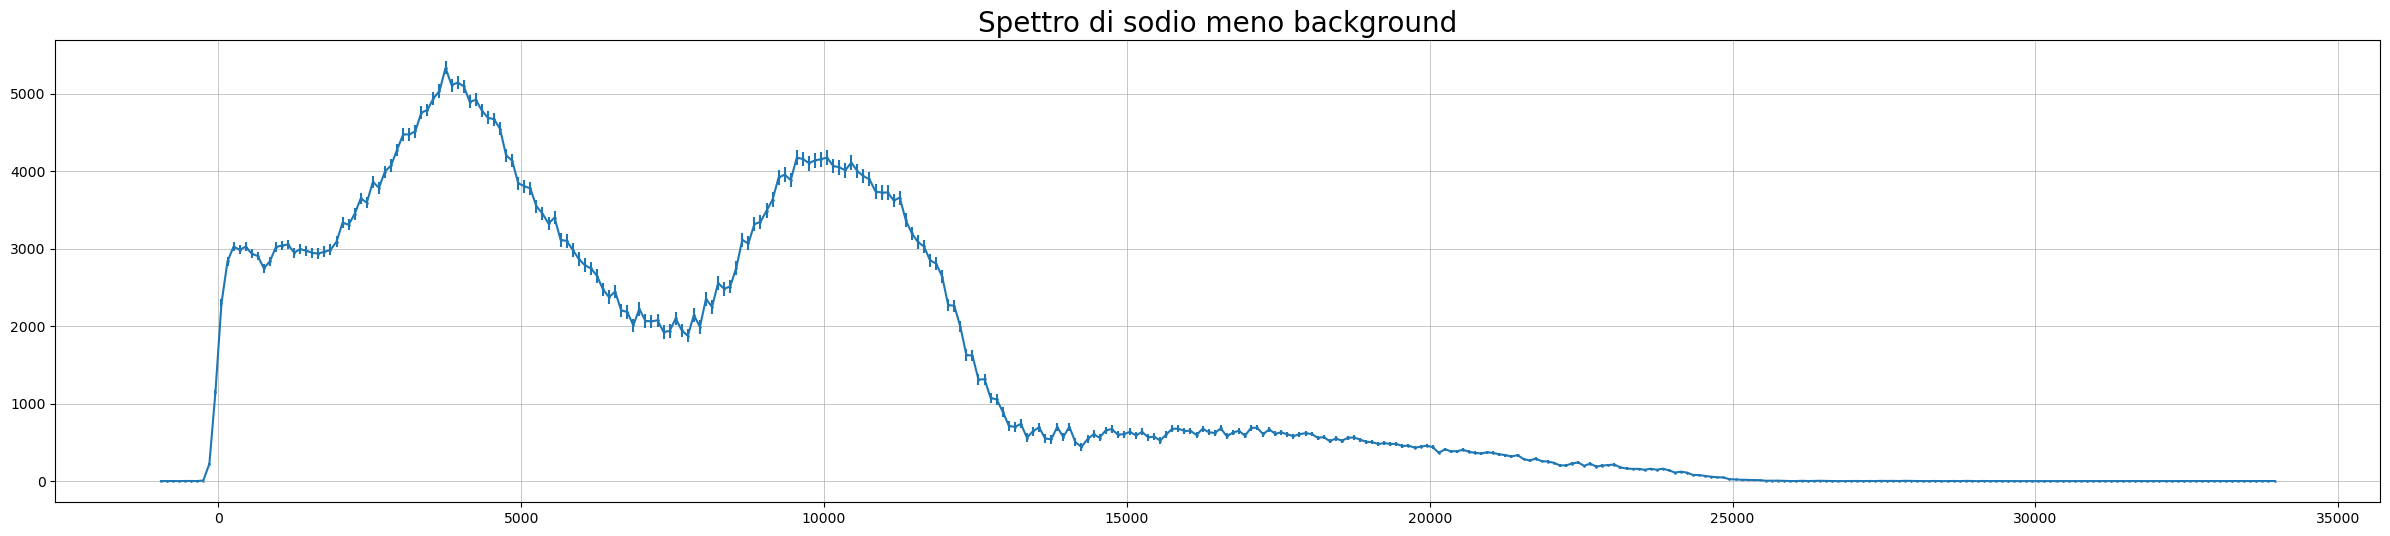

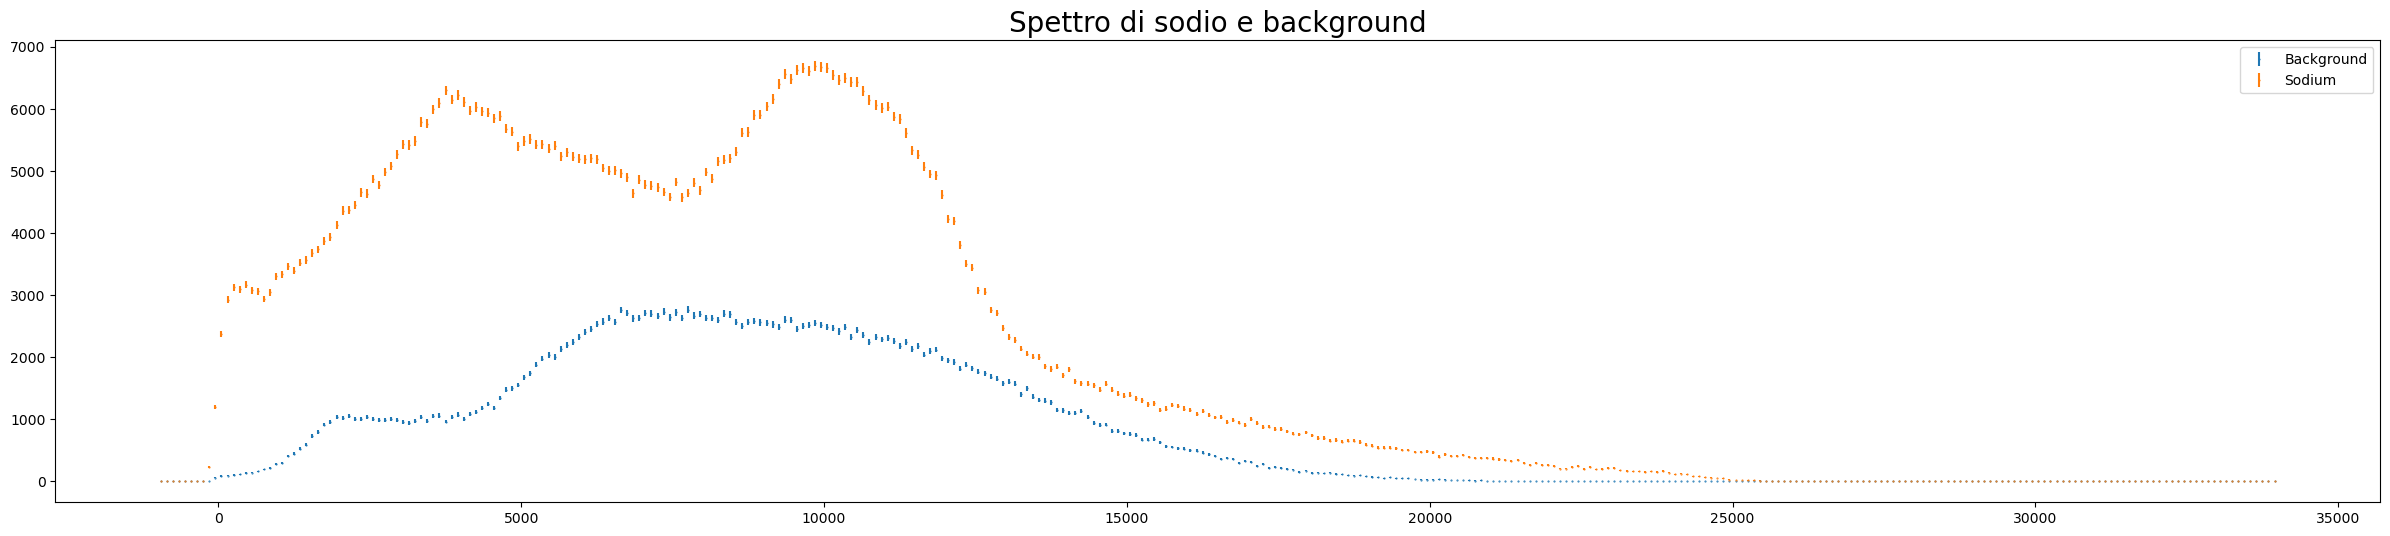

In [27]:
df_bkg = read_corretto(path='Dati/Parte 2/LySO/Bkg_30min.txt', titles=['ADC', 'Counts'])
df = read_corretto(path = 'Dati/Parte 2/LySO/Sodio_30min.txt', titles=['ADC', 'Counts'])
df_nobkg = df[:] - df_bkg [:]
df_nobkg['ADC'] = df['ADC']
err_df_nobkg = np.array(np.sqrt(df['Counts'][:] + df_bkg['Counts'][:]))
# print(len(df), '\n', len(df_bkg), '\n', df_nobkg)
fig, ax = plt.subplots(figsize = (30, 6))
plt.title('Spettro di sodio meno background', fontsize = 20)
plt.grid(True, linewidth = 0.5)
plt.scatter(df_nobkg['ADC'], df_nobkg['Counts'], s = 0.8)
plt.errorbar(df['ADC'], df_nobkg['Counts'], yerr=  err_df_nobkg)
fig, ax = plt.subplots(figsize = (30, 6))
plt.errorbar(df['ADC'], df_bkg['Counts'], yerr=  np.array(np.sqrt(df_bkg['Counts'][:])), fmt='o', markersize=0.5)
plt.errorbar(df['ADC'], df['Counts'], yerr=  np.array(np.sqrt(df['Counts'][:])), fmt='o', markersize=0.5)
plt.legend(['Background', 'Sodium'])
plt.title('Spettro di sodio e background', fontsize = 20)

## primo picco

<ErrorbarContainer object of 3 artists>

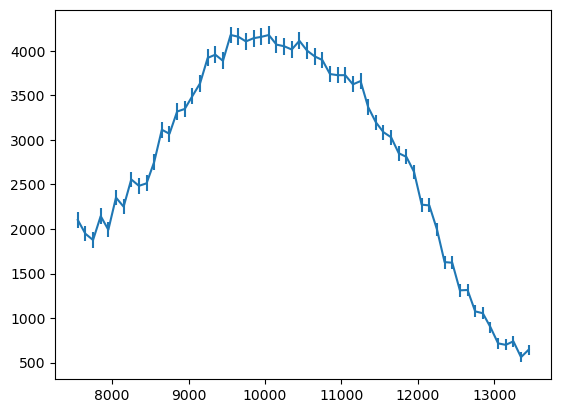

In [20]:
start_index = 150 - 65
end_index = 210 - 65
df_primo_picco = df_nobkg.iloc[start_index:end_index]
plt.errorbar(df_primo_picco['ADC'], df_primo_picco['Counts'], yerr = err_df_nobkg[start_index:end_index])

In [28]:
pars, vals, errs, *others = LS_fit(df_primo_picco['ADC'], df_primo_picco['Counts'], err_df_nobkg[start_index:end_index], gauss, mu = 10000, sigma = 1000, a = 2000)
for i in range(len(pars)):
    print(f'{pars[i]} = {vals[i]} +/- {errs[i]}')

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 253.4 (χ²/ndof = 4.4)      │              Nfcn = 78               │
│ EDM = 4.13e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │ 10.052e3  │  0.010e3  │            │            │         │         │       │
│ 1 │ sigma │  1.743e3  │  0.011e3  │            │            │         │         │       │
│ 2 │ a     │  4.244e3  │  0.021e3  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────┐
│       │      mu   sigma       a │
├───────┼─────────────────────────┤
│    mu │    99.7     -40      30 │
│ sigma │     -40     115 -0.14e3 │
│     a │      30 -0.14e3     444 │
└───────┴─────────────────────────┘

mu = 10051.609886038417 +/- 9.986680802326871
sigma = 1742.914950332337 +/- 10.706515134476655
a = 4243.538929214216 +/- 21.061869247587218
